<a href="https://colab.research.google.com/github/qtuter1997/MachineLearning/blob/main/d2l/CNN_simple_Sequential_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ToDo: introduce


3 way create a Keras model with Tensorflow 2.0 [Reference](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)
1.   Sequential
2.   Function API
3.   Model Subclassing


---




1.   Sequential Model
a.   Architecture model
    Block 1: Convolution and Max-Pooling
    Block 2: Convolution and Max-Pooling
    Block 3: Half-connected Network
    
    (TODO: add pic)

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense, concatenate

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [6]:
model = Sequential()
weight = 32
height = 32
classes = 10
shape = (weight, height, 3)

In [9]:
#Block 1
model.add(Conv2D(32, (3,3), padding='same',input_shape = shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#Block 2
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
#Connect Network
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [ ]:
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

Load data

In [13]:
from tensorflow.keras.datasets import cifar10

In [34]:
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()
x_train.shape[0]

50000

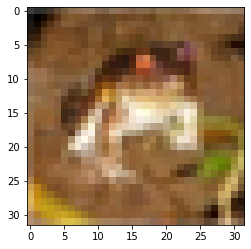

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

In [24]:
y_train[1,0]

9

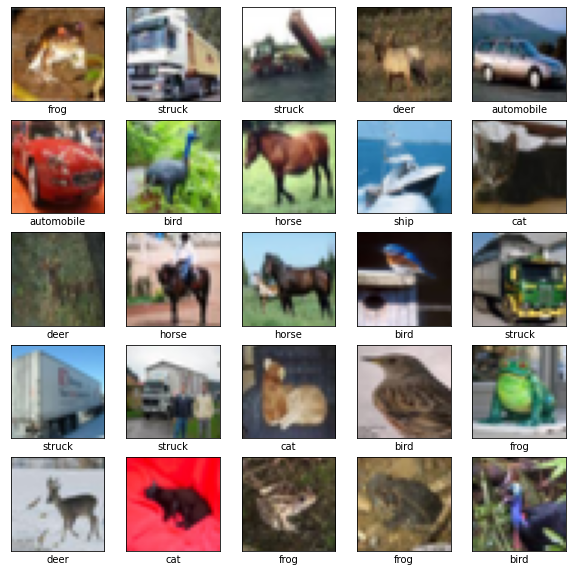

In [25]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'struck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap= plt.cm.binary)
  plt.xlabel(class_name[y_train[i,0]])
plt.show()

In [42]:
# Normalization data
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

y_train = y_train.astype('float32') / 255.0
y_test = y_test.astype('float32') / 255.0

In [43]:
# Data Augumentation
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15, horizontal_flip=True, fill_mode='nearest')

Training

In [50]:
lr = 1e-2
batch_size = 1024
num_epochs = 40

In [45]:
otp = SGD(learning_rate= lr, momentum=0.9, decay = lr / num_epochs)
model.compile(loss='categorical_crossentropy', optimizer=otp, metrics=['accuracy'])

In [46]:
y_test.shape

(10000, 10)

In [51]:
print('Start training . . .')
model.fit(aug.flow(x_train, y_train, batch_size=batch_size), 
                    steps_per_epoch= x_train.shape[0] // batch_size, 
                    validation_data= (x_test, y_test), epochs=num_epochs, verbose=1)

Start training . . .
Epoch 1/40
48/48 [==============================] - 22s 467ms/step - loss: 0.0200 - accuracy: 0.0528 - val_loss: 0.0189 - val_accuracy: 0.0444
Epoch 2/40
48/48 [==============================] - 23s 477ms/step - loss: 0.0200 - accuracy: 0.0530 - val_loss: 0.0189 - val_accuracy: 0.0443
Epoch 3/40
48/48 [==============================] - 24s 507ms/step - loss: 0.0200 - accuracy: 0.0529 - val_loss: 0.0189 - val_accuracy: 0.0443
Epoch 4/40
48/48 [==============================] - 25s 513ms/step - loss: 0.0200 - accuracy: 0.0527 - val_loss: 0.0189 - val_accuracy: 0.0444
Epoch 5/40
48/48 [==============================] - 24s 496ms/step - loss: 0.0200 - accuracy: 0.0536 - val_loss: 0.0189 - val_accuracy: 0.0444
Epoch 6/40
48/48 [==============================] - 24s 504ms/step - loss: 0.0200 - accuracy: 0.0517 - val_loss: 0.0188 - val_accuracy: 0.0447
Epoch 7/40
48/48 [==============================] - 24s 499ms/step - loss: 0.0200 - accuracy: 0.0525 - val_loss: 0.0189 -

In [52]:
model.save('model.h5')

In [55]:
model = tf.keras.models.load_model('model.h5')
result = model.predict(np.array(x_test[0:1] / 255.0))

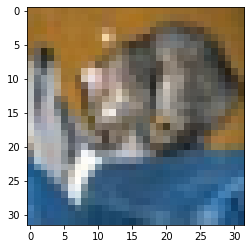

In [56]:
plt.imshow(x_test[0])

In [57]:
predict_label = np.argmax(result)
class_name[predict_label]

'ship'

In [58]:
y_test[0]

array([0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
Class MiniVGG(model):
  def __init__(self,classes):    
    super(MiniVGG, self).__init__()

    #Block 1.
    model.add()

    #Block 2

    
    #Block 3


    #This NN output is a Softmax layer with labels

  def call(self, input):
